<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E4%BF%A1%E7%94%A8%E6%83%85%E5%A0%B1%E3%81%AE%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**テキストの目的**

・実データに近いものの分析を行う

・データセットに対して自ら課題を設定できるようにする

**どのように学ぶか**

Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

**2.信用情報**

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


Home Credit Default Risk | Kaggle


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。



【問題1】コンペティション内容の把握


コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1.Home Creditはどのような企業？

2.このコンペティションでは何を予測する？

3.それを予測することで企業が得られるメリットは何？


問題１の解答について以下のとおり整理した。

①Home Creditは、Positiveで安全な借入体験を提供することにより、銀行口座を持たない人々の金融包摂を拡大するよう努めている。

②電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測し

③貸倒リスクを回避あるいは低減できるメリットがある。貸倒によう回収不能額については、税務における損金参入などは無視すればそのまま利益のマイナス及びキャッシュ・インの放棄となるため、これらの損失を回避できるという多大なメリットがある。

**データセットの準備**


分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となっています。


Dataページ内の他のcsvファイルはこの課題では扱いません。

**Notebooksについて**

コンペティションのNotebooksページで公開されているものを活用してください。


《推奨参考Notebooks》


Home Credit Default Risk Extensive EDA | Kaggle


HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle


HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle


この他タイトルにEDAと付いているものを参考にしてください。

In [1]:
# 必要なライブラリの読み込み
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt  # as○○で読み込んだライブラリの略称を設定
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

In [2]:
# データの読み込み
dataset = pd.read_csv("/content/drive/MyDrive/DIC/application_train.csv")

【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。


.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

In [3]:
# データの概観を把握するために.head()を行う
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dataset.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


上記結果については、

１列目がターゲット変数になっており、貸倒実績ありの場合は１とされている。

REG_CITY_NOT_LIVE_CITYは、連絡先が辿れなくなっていると夜逃げの可能性を示唆しているかもしれない。




In [5]:
# shapeを用いることでデータの行数や列数を確認
dataset.shape

(307511, 122)

In [6]:
# データの概観を把握するために.info()などを使う
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# 要約統計量を出力
dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

要約統計量を上記のとおり出し、以下のとおり考察した。

ダミー変数化していないカテゴリー変数のままの列もあるため、ここで把握しきれていない状態のデータになってしまっている。

上で.shapeして確認した行数307511行とID数が一致しているため、これらとcountが一致しているものは漏れのないデータと判断した。

ターゲット変数の平均値が0.080729なので遅延率は8%程度。

CNT_CHILDRENの最大値が19名となっているため、データの集計単位が適切でないかもしれない（お国柄で子供が多い国であれば問題ないかもしれない）ため本来的には、元データの正確性に対する追加調査が必要。



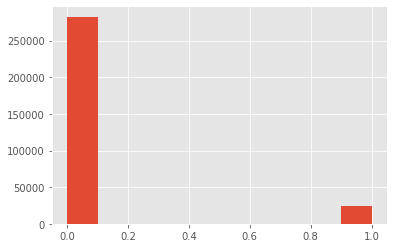

In [8]:
# 分布の確認
dataset['TARGET'].hist()

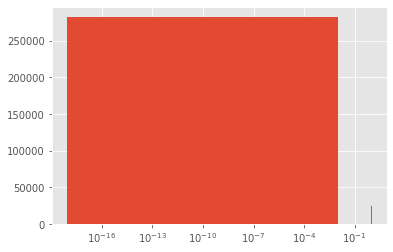

In [9]:
# 対数変換も実施
dataset['TARGET'].hist(bins = 100).set_xscale('log')

In [10]:
#  欠損値の有無を見る
col_names = dataset.columns
for col_name in col_names:
  missing_num = sum(pd.isnull(dataset[col_name]))
  print("{}の欠損値の数:{}個".format(col_name, missing_num))

SK_ID_CURRの欠損値の数:0個
TARGETの欠損値の数:0個
NAME_CONTRACT_TYPEの欠損値の数:0個
CODE_GENDERの欠損値の数:0個
FLAG_OWN_CARの欠損値の数:0個
FLAG_OWN_REALTYの欠損値の数:0個
CNT_CHILDRENの欠損値の数:0個
AMT_INCOME_TOTALの欠損値の数:0個
AMT_CREDITの欠損値の数:0個
AMT_ANNUITYの欠損値の数:12個
AMT_GOODS_PRICEの欠損値の数:278個
NAME_TYPE_SUITEの欠損値の数:1292個
NAME_INCOME_TYPEの欠損値の数:0個
NAME_EDUCATION_TYPEの欠損値の数:0個
NAME_FAMILY_STATUSの欠損値の数:0個
NAME_HOUSING_TYPEの欠損値の数:0個
REGION_POPULATION_RELATIVEの欠損値の数:0個
DAYS_BIRTHの欠損値の数:0個
DAYS_EMPLOYEDの欠損値の数:0個
DAYS_REGISTRATIONの欠損値の数:0個
DAYS_ID_PUBLISHの欠損値の数:0個
OWN_CAR_AGEの欠損値の数:202929個
FLAG_MOBILの欠損値の数:0個
FLAG_EMP_PHONEの欠損値の数:0個
FLAG_WORK_PHONEの欠損値の数:0個
FLAG_CONT_MOBILEの欠損値の数:0個
FLAG_PHONEの欠損値の数:0個
FLAG_EMAILの欠損値の数:0個
OCCUPATION_TYPEの欠損値の数:96391個
CNT_FAM_MEMBERSの欠損値の数:2個
REGION_RATING_CLIENTの欠損値の数:0個
REGION_RATING_CLIENT_W_CITYの欠損値の数:0個
WEEKDAY_APPR_PROCESS_STARTの欠損値の数:0個
HOUR_APPR_PROCESS_STARTの欠損値の数:0個
REG_REGION_NOT_LIVE_REGIONの欠損値の数:0個
REG_REGION_NOT_WORK_REGIONの欠損値の数:0個
LIVE_REGION_NOT_WORK_REGIONの欠損値の数:0個
REG_CITY_NOT_LIVE_CITY

In [11]:
# 各特徴量の欠損値の有無を確認する(テキストに指定されたmissingnoというライブラリでやってみたVer.)。
# まずMissingnoをインストール
import missingno as msno

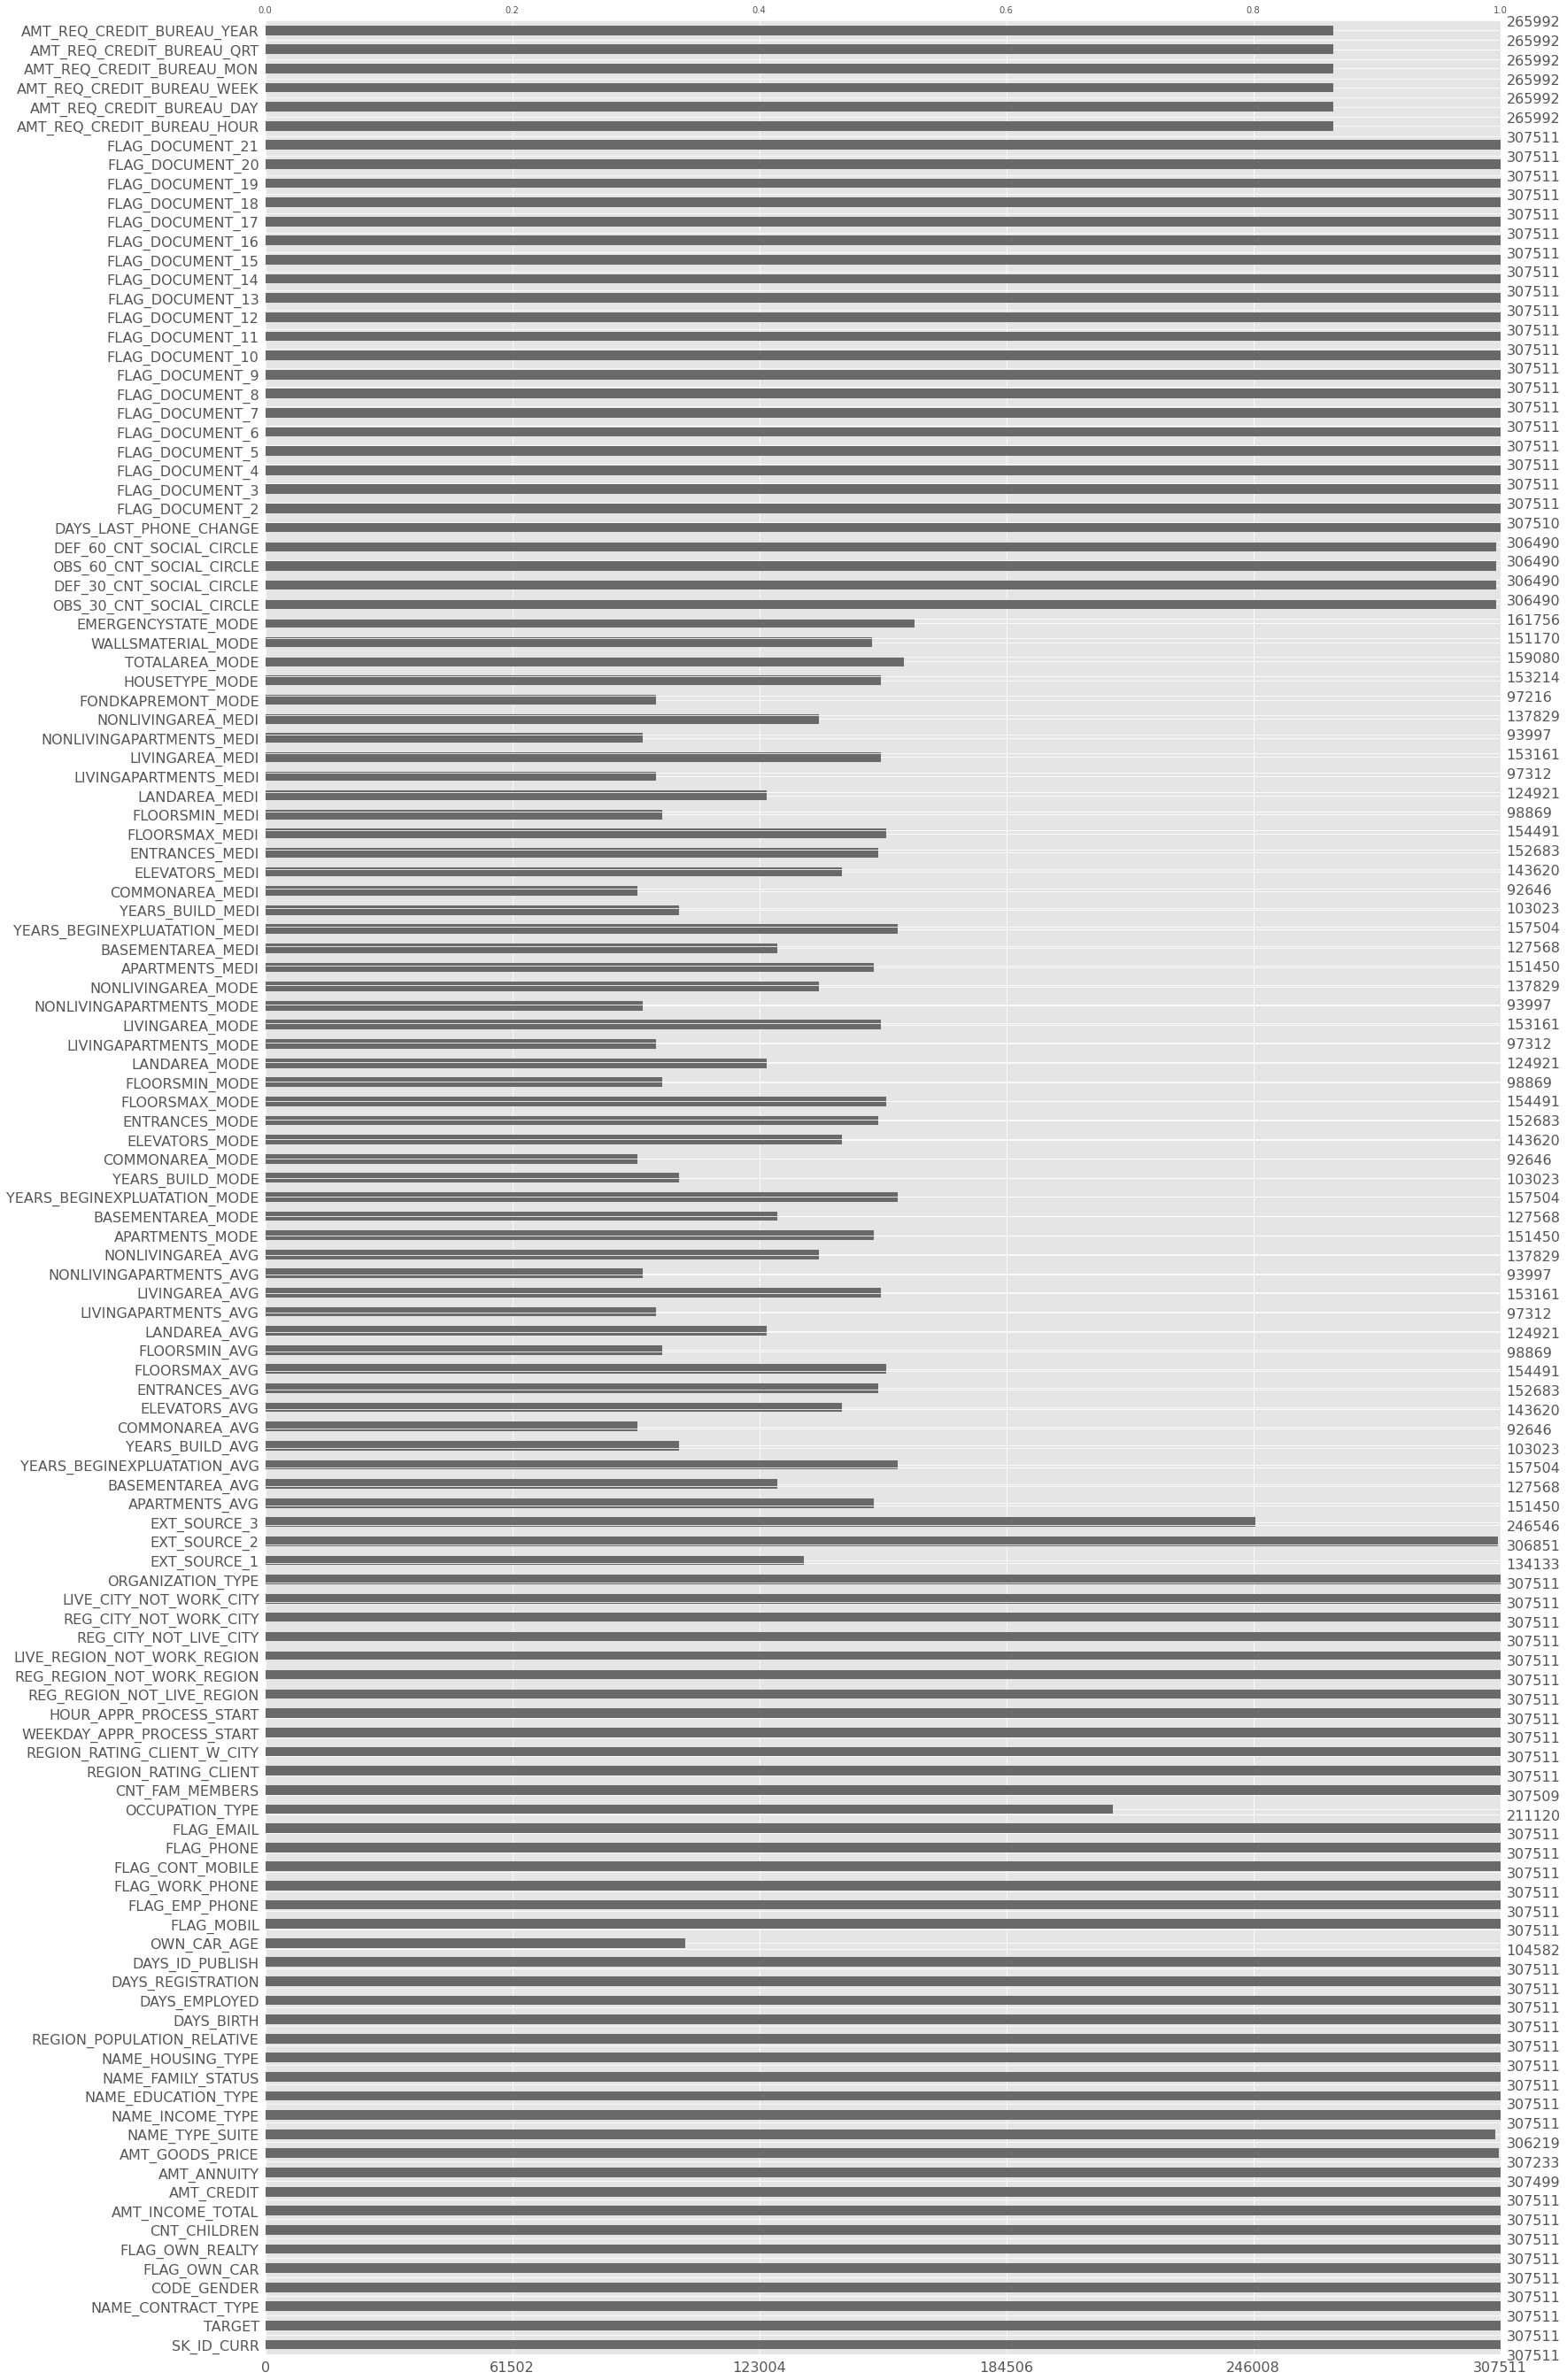

In [12]:
# 欠損値が何パーセント含まれるかを確認する。
msno.bar(dataset)

In [56]:
# 欠損値の確認(∵上記のとおり欠損値が多過ぎ)
missing_data = pd.DataFrame(dataset.isnull().sum() / len(dataset))
more_missing = missing_data[missing_data.iloc[:, 0] >= 0.5]
more_missing.shape

(41, 1)

欠損値に対する考察としては、以下の傾向を読み取った。

上記のとおり欠損値の方が多いデータが実に122列中41列と非常に多かった。

具体的には、以下のような問題点を孕んでいると確認した。

①OWN_CAR_AGEは欠損が多いが、本来は車の所有年数などのデータは取ることが難しくはないはず。
②
OCCUPAYTION_TYPEも欠損が多いが、就業していないと扱うか、解答を拒んでいると扱うかなどが不明であり欠損値への対応方針を決める必要性がある。


【問題3】課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

NAME_CONTRACT_TYPE
cashかリボ払いかで返済に差が生じるのか

CODE_GENDER
男女の違いが返済に影響を与えているのか

AMT_INCOME_TOTAL
収入の多寡つまり返済原資の多寡によって返済に影響があるのか

AMT_CREDIT
借金総額が多いと返済は難しくなっているのか

NAME_INCOME_TYPE
産休中など特定のINCOME_TYPEでは返済が困難になっていないか

DAYS_BIRTH	
申請時の年齢により返済に影響があるのか

FLAG_CONT_MOBILE
携帯電話が通じるかどうかは返済に影響があるのか

CNT_FAM_MEMBERS
家族の人数が多いと返済は厳しくなりがちなのか

ORGANIZATION_TYPE
どのような職種なのかによって返済に影響が出ているのか



*REG_CITY_NOT_LIVE_CITY*
→本籍地と連絡先が一致しない。





【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [30]:
import seaborn as sns
sns.set()

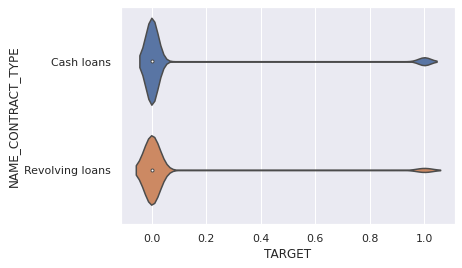

In [34]:
# 現金ローンorリボ払いが返済に与える影響を確認するべく、バイオリン図を使ってデータの分布を可視化
sns.violinplot(x = "TARGET", y = "NAME_CONTRACT_TYPE", data = dataset)

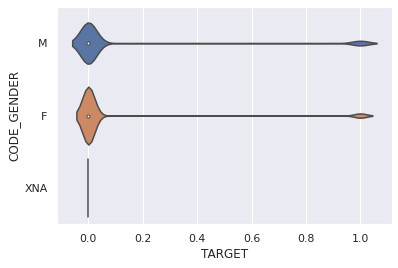

In [35]:
# 性別が返済に与える影響を確認するべく、バイオリン図を使ってデータの分布を可視化
sns.violinplot(x = "TARGET", y = "CODE_GENDER", data = dataset)

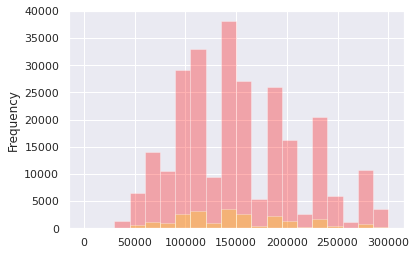

In [36]:
# 収入の多寡つまり返済原資の多寡によって返済に影響があるのかを確認するべく、ヒストグラムを使ってデータの分布を可視化
range = (0, 300000)
dataset['AMT_INCOME_TOTAL'][dataset['TARGET'] == 0].plot.hist(bins = 20, alpha = 0.3, color = 'red', range = range)
dataset['AMT_INCOME_TOTAL'][dataset['TARGET'] == 1].plot.hist(bins = 20, alpha = 0.3, color = 'gold', range = range)
plt.show()

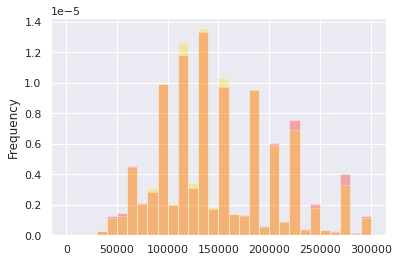

In [37]:
# 上記を正規化した場合
range = (0, 300000)
dataset['AMT_INCOME_TOTAL'][dataset['TARGET'] == 0].plot.hist(bins = 30, alpha = 0.3, color = 'red', density = True, range = range)
dataset['AMT_INCOME_TOTAL'][dataset['TARGET'] == 1].plot.hist(bins = 30, alpha = 0.3, color = 'gold', density = True, range = range)
plt.show()

(-1.107699336213084,
 1.1026246213582482,
 -1.1075302665025313,
 1.100358584119168)

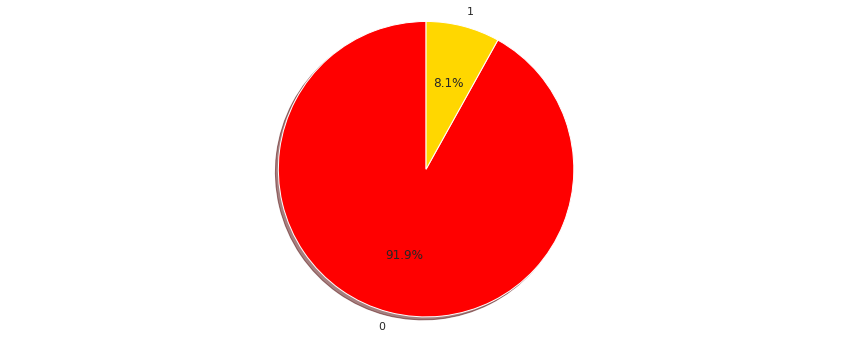

In [38]:
# 授業中の解説で紹介されていたような円グラフも描いてみる
data = dataset['TARGET'].value_counts().values
labels = ['0', '1']
colors = ['red', 'gold']

# グラフの大きさを指定
plt.figure(figsize = (15, 6))

# グラフを表示
plt.pie(data, labels = labels, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)

# 円を丸く描画
plt.axis('equal')

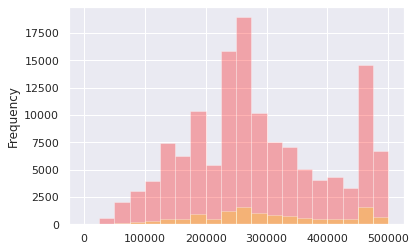

In [39]:
# 借金の総額で差が生じるのか
range = (0, 500000)
dataset['AMT_CREDIT'][dataset['TARGET'] == 0].plot.hist(bins = 20, alpha = 0.3, color = 'red', range = range)
dataset['AMT_CREDIT'][dataset['TARGET'] == 1].plot.hist(bins = 20, alpha = 0.3, color = 'gold', range = range)
plt.show()

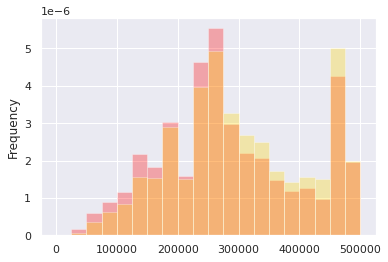

In [40]:
# 上記を正規化した場合
range = (0, 500000)
dataset['AMT_CREDIT'][dataset['TARGET'] == 0].plot.hist(bins = 20, alpha = 0.3, color = 'red', density = True, range = range)
dataset['AMT_CREDIT'][dataset['TARGET'] == 1].plot.hist(bins = 20, alpha = 0.3, color = 'gold', density = True, range = range)
plt.show()

In [21]:
display(dataset['OBS_30_CNT_SOCIAL_CIRCLE'][dataset['TARGET'] == 0].describe())
display(dataset['OBS_30_CNT_SOCIAL_CIRCLE'][dataset['TARGET'] == 1].describe())

count    281701.000000
mean          1.415742
std           2.402858
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

count    24789.000000
mean         1.496147
std          2.378438
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

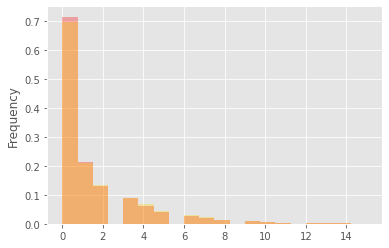

In [26]:
dataset['OBS_30_CNT_SOCIAL_CIRCLE'][dataset['TARGET'] == 0].plot.hist(bins = 20, alpha = 0.3, color = 'red', density = True, range = (0, 15))
dataset['OBS_30_CNT_SOCIAL_CIRCLE'][dataset['TARGET'] == 1].plot.hist(bins = 20, alpha = 0.3, color = 'Gold', density = True, range = (0, 15))

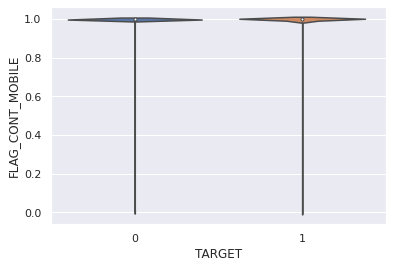

In [41]:
# 携帯電話がつながって連絡が取れるかどうかが返済に与える影響を確認するべく、バイオリン図を使ってデータの分布を可視化
sns.violinplot(x = "TARGET", y = "FLAG_CONT_MOBILE", data = dataset)

返済が滞っている人たちも携帯電話には出れており、音信普通の人が返済しなくなっている場合は少ない。


【問題5】（アドバンス課題）Notebooksへの投稿

必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。